In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import PIL
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
ACTIONS = [['LEFT'], ['RIGHT'], ['LEFT', 'DOWN'], ['RIGHT', 'DOWN'], ['DOWN'],
           ['DOWN', 'B'], ['B']]

In [3]:
from torchvision.models import alexnet
anet = alexnet(pretrained=True)
print(anet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
from visualize.visualize import gen_eval_vid_frame
from a2c_ppo_acktr.envs import make_vec_envs

from PIL import Image

In [5]:
seed = 10
device = "cuda:0"
env_state = "GreenHillZone.Act1"
env = make_vec_envs(
    [env_state],
    seed + 1000,
    1,
    None,
    device=device,
    allow_early_resets=False,
    mode='eval')

In [6]:
# model_path = "saved-runs/05-13_04-14-36/ppo/GreenHillZone.Act1/ckpts/runs_05-13_04-14-36_ppo_GreenHillZone.Act1-1001472.pt"
# model = torch.load(model_path)
# print(model)
from a2c_ppo_acktr.model import Policy

obs_space = env.observation_space
obs_module = {'video': 'video-large', 'audio': 'audio-small'}
assert set(obs_space.spaces.keys()) == set(obs_module.keys()), "Observation spaces and modules must have same keys."
actor_critic = Policy(
    obs_space,
    obs_module,
    env.action_space,
    base_kwargs={'recurrent': False})
env_step = 0
episode_num = 0
actor_critic.to(device)
actor_critic.train()

Policy(
  (base): NNBase2(
    (audio_module): Sequential(
      (0): MelSpectrogram(
        (spectrogram): Spectrogram()
        (mel_scale): MelScale()
      )
      (1): Divide()
      (2): Flatten()
      (3): Linear(in_features=256, out_features=256, bias=True)
      (4): ReLU()
    )
    (video_module): Sequential(
      (0): Divide()
      (1): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
      (2): ReLU()
      (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (4): ReLU()
      (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (6): ReLU()
      (7): Flatten()
      (8): Linear(in_features=55296, out_features=512, bias=True)
      (9): ReLU()
    )
  )
  (critic_linear): Linear(in_features=768, out_features=1, bias=True)
  (dist): Categorical(
    (linear): Linear(in_features=768, out_features=7, bias=True)
  )
)

obs_audio_mels (128, 736)
obs_audio_mels [[1.59139595e+01 1.59131413e+01 1.59107008e+01 ... 1.61474001e+00
  1.61483693e+00 1.61474001e+00]
 [5.94046745e+01 5.94016190e+01 5.93925095e+01 ... 6.02760792e+00
  6.02796984e+00 6.02760792e+00]
 [4.99820852e+00 4.99770927e+00 4.99621344e+00 ... 1.10754645e+00
  1.10765767e+00 1.10754621e+00]
 ...
 [7.00987759e-04 7.01003242e-04 7.01038691e-04 ... 4.16821073e-04
  4.16800263e-04 4.16814582e-04]
 [2.15173786e-04 2.15170323e-04 2.15165070e-04 ... 3.50172078e-04
  3.50182032e-04 3.50166578e-04]
 [2.44062103e-04 2.44051218e-04 2.44041978e-04 ... 1.40633580e-04
  1.40637043e-04 1.40634293e-04]]
1157760


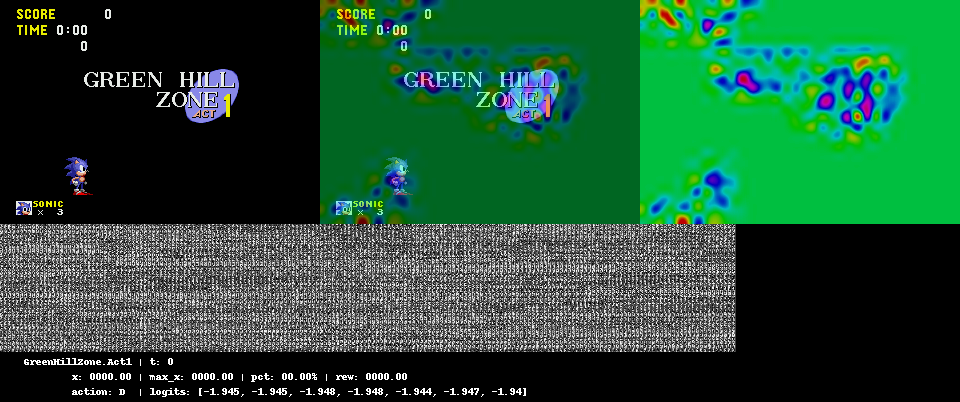

obs_audio_mels (128, 736)
obs_audio_mels [[1.1896483e+01 1.1898985e+01 1.1906490e+01 ... 2.0545931e+01
  2.0544350e+01 2.0545931e+01]
 [4.4407978e+01 4.4417313e+01 4.4445328e+01 ... 7.6695198e+01
  7.6689301e+01 7.6695198e+01]
 [7.4894552e+00 7.4910812e+00 7.4959655e+00 ... 5.2975704e+01
  5.2977760e+01 5.2975723e+01]
 ...
 [1.8586945e-02 1.8586429e-02 1.8585058e-02 ... 1.0709263e-02
  1.0709119e-02 1.0709288e-02]
 [4.0113054e-02 4.0112797e-02 4.0112428e-02 ... 2.0202471e-02
  2.0202283e-02 2.0202523e-02]
 [7.6753972e-03 7.6749958e-03 7.6738875e-03 ... 4.6773525e-03
  4.6774824e-03 4.6773758e-03]]
1157760


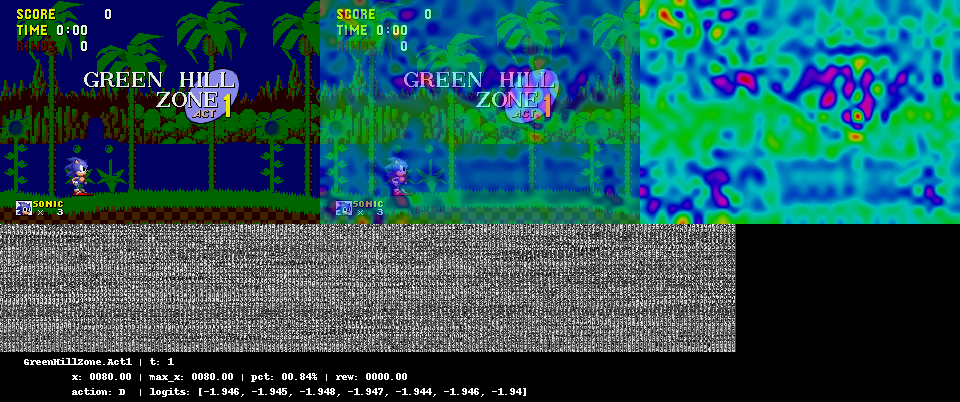

obs_audio_mels (128, 736)
obs_audio_mels [[1.1134500e-02 1.1154453e-02 1.1214369e-02 ... 2.1050243e+00
  2.1050787e+00 2.1050243e+00]
 [4.1563593e-02 4.1638080e-02 4.1861735e-02 ... 7.8577733e+00
  7.8579764e+00 7.8577733e+00]
 [4.4024911e-02 4.4094782e-02 4.4304159e-02 ... 4.8807219e-01
  4.8789066e-01 4.8807228e-01]
 ...
 [1.8995346e-03 1.8995089e-03 1.8995322e-03 ... 2.8156003e-04
  2.8156838e-04 2.8155741e-04]
 [2.4186175e-03 2.4185220e-03 2.4182296e-03 ... 3.0346063e-04
  3.0346119e-04 3.0345269e-04]
 [5.0269964e-04 5.0268939e-04 5.0261384e-04 ... 2.5029187e-04
  2.5029614e-04 2.5029102e-04]]
1157760


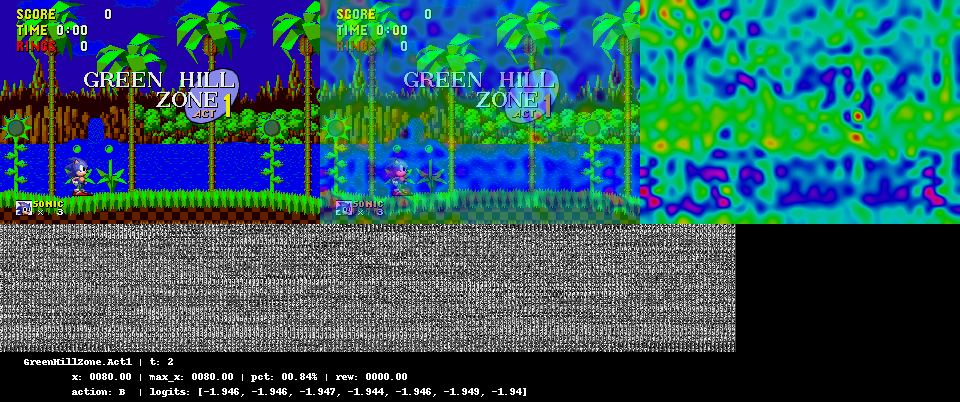

In [8]:
recurrent_hidden_states = torch.zeros(1, actor_critic.recurrent_hidden_state_size).to(device)
masks = torch.zeros(1, 1).to(device)

obs = env.reset()
i = 0
info = None
while True:
    if i >= 3:
        break
    with torch.no_grad():
        value, action, _, recurrent_hidden_states, logits = actor_critic.act(
            obs, recurrent_hidden_states, masks, deterministic=True)

    x = 0 if info is None else info[0]['x']
    max_x = 0 if info is None else info[0]['max_x']
    pct = 0 if info is None else info[0]['max_x']/info[0]['lvl_max_x']*100
    rew = 0 if info is None else info[0]['sum_r']
    t = i
    a = action.item()
    tgt_layer = {'video': 5}
    f = gen_eval_vid_frame(
        actor_critic, env_state, x, max_x, pct, rew, t, a, logits, obs, tgt_layer)
    print(f.size)
    display(Image.fromarray(f, 'RGB'))
#     display(f)
    

    # Obser reward and next obs
    obs, reward, done, info = env.step(action)
    masks.fill_(0.0 if done else 1.0)
    
    if done:
        print(f"max_x {info[0]['max_x']}, stage len {info[0]['screen_x_end']}")
        break
    i += 1